<a href="https://colab.research.google.com/github/Utsuk7/Weapon-Detection-System-using-Deep-Learning-/blob/main/Weapon_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [2]:
!kaggle datasets download -d snehilsanyal/weapon-detection-test

Dataset URL: https://www.kaggle.com/datasets/snehilsanyal/weapon-detection-test
License(s): CC0-1.0
 91% 177M/194M [00:01<00:00, 132MB/s]
100% 194M/194M [00:02<00:00, 101MB/s]


In [3]:
import zipfile
zip_ref = zipfile.ZipFile('/content/weapon-detection-test.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Conv2D,Dense,MaxPooling2D,Flatten,BatchNormalization,Dropout

In [5]:
#generators -> divides the data into batches and then a batch is loaded in the RAM thus saving ram
#name of generator image dataset directory

train_dataset=keras.utils.image_dataset_from_directory(
    directory='/content/weapon_detection/train',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),

)
test_dataset=keras.utils.image_dataset_from_directory(
    directory='/content/weapon_detection/val',
    labels="inferred",
    label_mode="int",
    batch_size=32,
    image_size=(256, 256),

)

Found 571 files belonging to 2 classes.
Found 143 files belonging to 2 classes.


In [6]:
print(train_dataset)
print(test_dataset)

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [7]:
#the values stored above are in form of numpy array from 0 to 256 ... now these needs to be converted in range of 0 to 1
#So NORMALISE
def process(image,label):
  image=tf.cast(image/255,tf.float32)
  return image,label

train_dataset=train_dataset.map(process)
test_dataset=test_dataset.map(process)

In [8]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(9,activation='softmax'))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 30, 30, 128)       0

In [10]:
#if sparse categorical entropy is not used then following can be used to one hot encode the label data
'''!pip install tensorflow

import tensorflow as tf

#... your existing code for model definition and preprocessing ...

# Convert labels to one-hot encoding
train_dataset = train_dataset.map(lambda image, label: (image, tf.one_hot(label, depth=9)))
test_dataset = test_dataset.map(lambda image, label: (image, tf.one_hot(label, depth=9)))

'''

'!pip install tensorflow\n\nimport tensorflow as tf\n\n#... your existing code for model definition and preprocessing ...\n\n# Convert labels to one-hot encoding\ntrain_dataset = train_dataset.map(lambda image, label: (image, tf.one_hot(label, depth=9))) \ntest_dataset = test_dataset.map(lambda image, label: (image, tf.one_hot(label, depth=9)))\n\n'

In [11]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [12]:
#call back
my_callbacks = [
    keras.callbacks.EarlyStopping(patience=10),
    keras.callbacks.ModelCheckpoint(filepath='model.{epoch:02d}-{val_loss:.2f}.h5'),
    keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [13]:
history = model.fit(train_dataset,epochs=20,validation_data=test_dataset,callbacks=my_callbacks)

Epoch 1/20
18/18 [==============================] - ETA: 0s - loss: 0.1180 - accuracy: 0.9632

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


18/18 [==============================] - 28s 733ms/step - loss: 0.1180 - accuracy: 0.9632 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 2/20
18/18 [==============================] - 11s 428ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 3/20
18/18 [==============================] - 11s 387ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 4/20
18/18 [==============================] - 12s 491ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 5/20
18/18 [==============================] - 13s 572ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 6/20
18/18 [==============================] - 11s 379ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0000e+00 - val_accuracy: 1.0000
Epoch 7/20
18/18 [==============================] - 11s 447ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - va

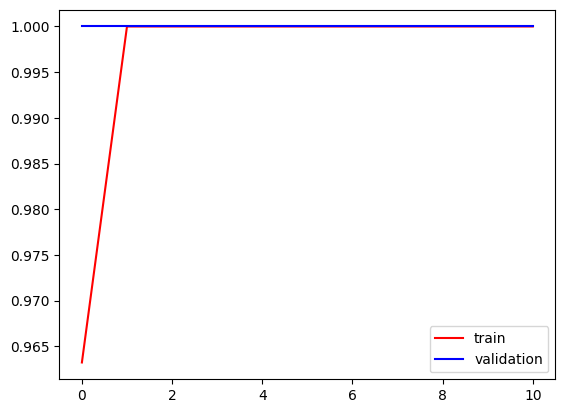

In [14]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [22]:
model=Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(9,activation='softmax'))


In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [24]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [25]:
history = model.fit(train_dataset,epochs=10,validation_data=test_dataset,callbacks=my_callbacks)

Epoch 1/10
18/18 [==============================] - ETA: 0s - loss: 0.8484 - accuracy: 0.9282

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


18/18 [==============================] - 16s 336ms/step - loss: 0.8484 - accuracy: 0.9282 - val_loss: 3.1939 - val_accuracy: 0.5105
Epoch 2/10
18/18 [==============================] - 12s 511ms/step - loss: 0.0680 - accuracy: 0.9965 - val_loss: 3.9246 - val_accuracy: 0.4406
Epoch 3/10
18/18 [==============================] - 12s 498ms/step - loss: 2.8602e-08 - accuracy: 1.0000 - val_loss: 12.0359 - val_accuracy: 0.2168
Epoch 4/10
18/18 [==============================] - 10s 404ms/step - loss: 0.0161 - accuracy: 0.9982 - val_loss: 0.2153 - val_accuracy: 0.9510
Epoch 5/10
18/18 [==============================] - 12s 453ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.2121 - val_accuracy: 0.9441
Epoch 6/10
18/18 [==============================] - 12s 452ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0892 - val_accuracy: 0.9790
Epoch 7/10
18/18 [==============================] - 12s 482ms/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.0629 - val_accuracy: 

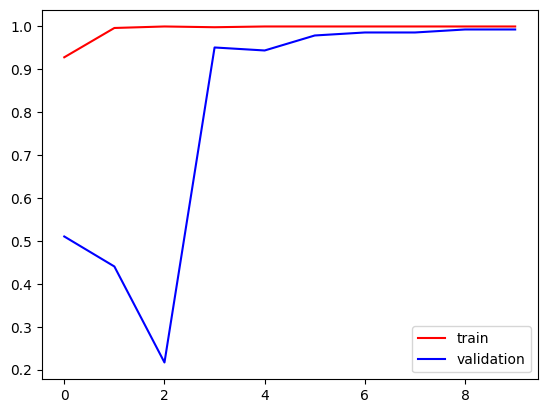

In [26]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

In [27]:
import cv2

In [28]:
test_img=cv2.imread('/content/weapon_detection/val/images/Sword_86.jpeg')

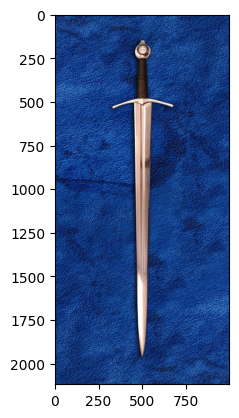

In [29]:
plt.imshow(test_img)

In [30]:
test_img.shape

(2119, 1000, 3)

In [31]:
test_img=cv2.resize(test_img,dsize=(256,256))

In [32]:
test_input=test_img.reshape((1,256,256,3))

In [33]:
model.predict(test_input)

1/1 [==============================] - 0s 106ms/step


array([[1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)